### importations

In [1]:
pip install folium     #this is neccesary to intall only once

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install obspy   #this is neccesary to intall only once

Note: you may need to restart the kernel to use updated packages.


In [3]:
#fist we install the libraries we're gonna use

from obspy import UTCDateTime
from obspy.clients.fdsn import Client

import folium

from tp_obspy_utils import plot_record_section
from tp_obspy_utils import plot_stations

from obspy import read
from tp_obspy_utils import get_periodogram

### Research of the earthquake
We chose an earthquake that took place in april 2016 in Ecuador, with a magnitude over 7.0. First, let's find this event.

In [4]:
minlat = -5
maxlat = 1
minlg = -92
maxlg = -74
minmag = 7

In [5]:
start = "2016-01-01"
end = "2016-12-31"

In [6]:
events = Client("IRIS").get_events(
    minlatitude=minlat,
    maxlatitude=maxlat,
    minlongitude=minlg,
    maxlongitude=maxlg,
    minmagnitude=minmag,
    starttime=UTCDateTime(start),
    endtime=UTCDateTime(end),
)

In [7]:
print("\nFound %s event(s) from EMSC Data Center:\n" % len(events))
print(events)


Found 1 event(s) from EMSC Data Center:

1 Event(s) in Catalog:
2016-04-16T23:58:36.980000Z |  +0.382,  -79.922 | 7.8 mww


Now, we write the characteristics of the event.

In [8]:
n = 0

In [9]:
eqo = events[n].origins[0]
start = eqo.time
print(events[n])
print("mag =", events[n].magnitudes[0].mag)
print("eqo.latitude =", eqo.latitude)
print("eqo.longitude =", eqo.longitude)
print("eqo.depth =", eqo.depth)
print("eqo start =", start)

Event:	2016-04-16T23:58:36.980000Z |  +0.382,  -79.922 | 7.8 mww

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=5180176")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=14132622")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=179503757")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements
mag = 7.8
eqo.latitude = 0.3819
eqo.longitude = -79.9218
eqo.depth = 20590.0
eqo start = 2016-04-16T23:58:36.980000Z


### Data request
Here is the request to download the data from the network we chose.

In [10]:
client = Client("IRIS")   #we can also ask for other sources 
start = UTCDateTime(start)

In [11]:
# using the ecuador network, the name for this country is EC
st = client.get_waveforms(
    network="EC",
    station="*",
    location="*",
    channel="HHZ",
    starttime=start,
    endtime=start + 900,
    attach_response=True,
)

In [12]:
print(st)

15 Trace(s) in Stream:
EC.ANTS..HHZ | 2016-04-16T23:58:36.988393Z - 2016-04-17T00:13:36.978393Z | 100.0 Hz, 90000 samples
EC.ARNL..HHZ | 2016-04-16T23:58:36.988393Z - 2016-04-17T00:13:36.978393Z | 100.0 Hz, 90000 samples
EC.BOSC..HHZ | 2016-04-16T23:58:36.988393Z - 2016-04-17T00:13:36.978393Z | 100.0 Hz, 90000 samples
EC.CHSH..HHZ | 2016-04-16T23:58:36.988393Z - 2016-04-17T00:13:36.978393Z | 100.0 Hz, 90000 samples
EC.COHC..HHZ | 2016-04-16T23:58:36.988393Z - 2016-04-17T00:13:36.978393Z | 100.0 Hz, 90000 samples
EC.CUIC..HHZ | 2016-04-16T23:58:36.988391Z - 2016-04-17T00:13:36.978391Z | 100.0 Hz, 90000 samples
EC.GGPC..HHZ | 2016-04-16T23:58:36.988394Z - 2016-04-17T00:13:36.978394Z | 100.0 Hz, 90000 samples
EC.MCRA..HHZ | 2016-04-16T23:58:36.988393Z - 2016-04-17T00:13:36.978393Z | 100.0 Hz, 90000 samples
EC.PORT..HHZ | 2016-04-16T23:58:36.988394Z - 2016-04-17T00:13:36.978394Z | 100.0 Hz, 90000 samples
EC.PULU..HHZ | 2016-04-16T23:58:36.988393Z - 2016-04-17T00:13:36.978393Z | 100.0 Hz, 9

In [13]:
inventory = client.get_stations(network="EC",
    station="*",
    location="*",
    channel="HHZ",
    starttime=start,
    endtime=start + 900,
    level='response'
)

In [14]:
print(inventory)

Inventory created at 2021-12-12T18:42:05.392000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2016-04-16...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			EC
		Stations (18):
			EC.ANTS (OVANTI_S)
			EC.ARNL (RENSIG, RENAC)
			EC.BOSC (RENSIG, RENAC)
			EC.CHSH (OVCHIM_S)
			EC.COHC (RENSIG, RENAC)
			EC.CUIC (OVCUIC_S)
			EC.GGPC (OVPICH_S)
			EC.IMBA (OVIMBA_S)
			EC.MCRA (RENSIG, RENAC)
			EC.PORT (OVCHIM_S)
			EC.PULU (OVPULU_S)
			EC.PUYO (RENSIG)
			EC.SAGO (Sagoatoa, Ambato, Ecuador)
			EC.SALI (RENSIG, RENAC)
			EC.SLOR (TEMP - COTO)
			EC.TULM (RENSIG)
			EC.VCES (RENSIG)
			EC.ZUMB (RENSIG, RENAC)
		Channels (18):
			EC.ANTS..HHZ, EC.ARNL..HHZ, EC.BOSC..HHZ, EC.CHSH..HHZ, 
			EC.COHC..HHZ, EC.CUIC..HHZ, EC.GGPC..HHZ, EC.IMBA..HHZ, 
			EC.MCRA..HHZ, EC.PORT..HHZ, EC.PULU..HHZ, EC.PUYO..HHZ, 
			EC.SAGO..HHZ, EC.SALI..HHZ, EC.SLOR..HHZ, EC.TULM..HHZ, 
			EC.VCES..HHZ, EC.Z

Some stations have no data of the erthquake. We remove them from the inventory

In [15]:
inventory = inventory.remove(station='IMBA')
inventory = inventory.remove(station='SAGO')
inventory = inventory.remove(station='SALI')
print(inventory)

Inventory created at 2021-12-12T18:42:05.392000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2016-04-16...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			EC
		Stations (15):
			EC.ANTS (OVANTI_S)
			EC.ARNL (RENSIG, RENAC)
			EC.BOSC (RENSIG, RENAC)
			EC.CHSH (OVCHIM_S)
			EC.COHC (RENSIG, RENAC)
			EC.CUIC (OVCUIC_S)
			EC.GGPC (OVPICH_S)
			EC.MCRA (RENSIG, RENAC)
			EC.PORT (OVCHIM_S)
			EC.PULU (OVPULU_S)
			EC.PUYO (RENSIG)
			EC.SLOR (TEMP - COTO)
			EC.TULM (RENSIG)
			EC.VCES (RENSIG)
			EC.ZUMB (RENSIG, RENAC)
		Channels (15):
			EC.ANTS..HHZ, EC.ARNL..HHZ, EC.BOSC..HHZ, EC.CHSH..HHZ, 
			EC.COHC..HHZ, EC.CUIC..HHZ, EC.GGPC..HHZ, EC.MCRA..HHZ, 
			EC.PORT..HHZ, EC.PULU..HHZ, EC.PUYO..HHZ, EC.SLOR..HHZ, 
			EC.TULM..HHZ, EC.VCES..HHZ, EC.ZUMB..HHZ


### Plot of the stations used and of the epicenter of the earthquake

In [16]:
stations = []
for net in inventory:
    for sta in net:
        if minlat <= sta.latitude <= maxlat and minlg <= sta.longitude <= maxlg:
            stations.append(
                [net.code, sta.code, sta.latitude, sta.longitude, sta.elevation]
            )
            print(net.code, sta.code, sta.latitude, sta.longitude, sta.elevation)

EC ANTS -0.4973 -78.170403 4580.0
EC ARNL -3.5478 -80.067001 44.0
EC BOSC -3.1512 -78.495102 1398.0
EC CHSH -1.49385 -78.869331 4476.0
EC COHC -2.4661 -79.257401 626.0
EC CUIC 0.304 -78.361 3165.0
EC GGPC -0.1804 -78.593697 4495.0
EC MCRA -4.3697 -79.954399 540.0
EC PORT -1.4633 -78.773102 4469.0
EC PULU 0.0218 -78.502197 3114.0
EC PUYO -1.493 -78.024902 1070.0
EC SLOR -0.729811 -78.496742 3600.0
EC TULM 0.7161 -77.786903 3677.0
EC VCES -0.79991 -78.39444 4044.0
EC ZUMB -4.8637 -79.143898 1286.0


In [22]:
carte = plot_stations(stations, origin=[-3, -83], zoom=6, color="green")

In [23]:
infos = "(%s, %s) depth=%s m" % (eqo.latitude, eqo.longitude, eqo.depth)
folium.CircleMarker(
    location=[eqo.latitude, eqo.longitude], radius=5,  color="red"
).add_to(carte);

In [24]:
carte

### Observation of the response of the instruments
Let's now see if the stations used have a good response.

Inventory created at 2021-12-12T18:42:05.392000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2016-04-16...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			EC
		Stations (15):
			EC.ANTS (OVANTI_S)
			EC.ARNL (RENSIG, RENAC)
			EC.BOSC (RENSIG, RENAC)
			EC.CHSH (OVCHIM_S)
			EC.COHC (RENSIG, RENAC)
			EC.CUIC (OVCUIC_S)
			EC.GGPC (OVPICH_S)
			EC.MCRA (RENSIG, RENAC)
			EC.PORT (OVCHIM_S)
			EC.PULU (OVPULU_S)
			EC.PUYO (RENSIG)
			EC.SLOR (TEMP - COTO)
			EC.TULM (RENSIG)
			EC.VCES (RENSIG)
			EC.ZUMB (RENSIG, RENAC)
		Channels (15):
			EC.ANTS..HHZ, EC.ARNL..HHZ, EC.BOSC..HHZ, EC.CHSH..HHZ, 
			EC.COHC..HHZ, EC.CUIC..HHZ, EC.GGPC..HHZ, EC.MCRA..HHZ, 
			EC.PORT..HHZ, EC.PULU..HHZ, EC.PUYO..HHZ, EC.SLOR..HHZ, 
			EC.TULM..HHZ, EC.VCES..HHZ, EC.ZUMB..HHZ


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent.

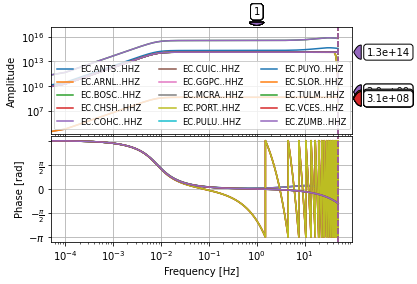

In [25]:
inventory2 = inventory.copy()
print(inventory2)
inventory2[0].plot_response(min_freq=1e-4,outfile='response.png');

Here is the recoding of the data in miniseed format

In [26]:
st.write("./world_eq.mseed")

### Visualization of the signals
Here is the plot of the raw signal on the channels HHZ.

In [27]:
st.plot(size=(1000, 600), outfile="raw_stream_ecuador.png")

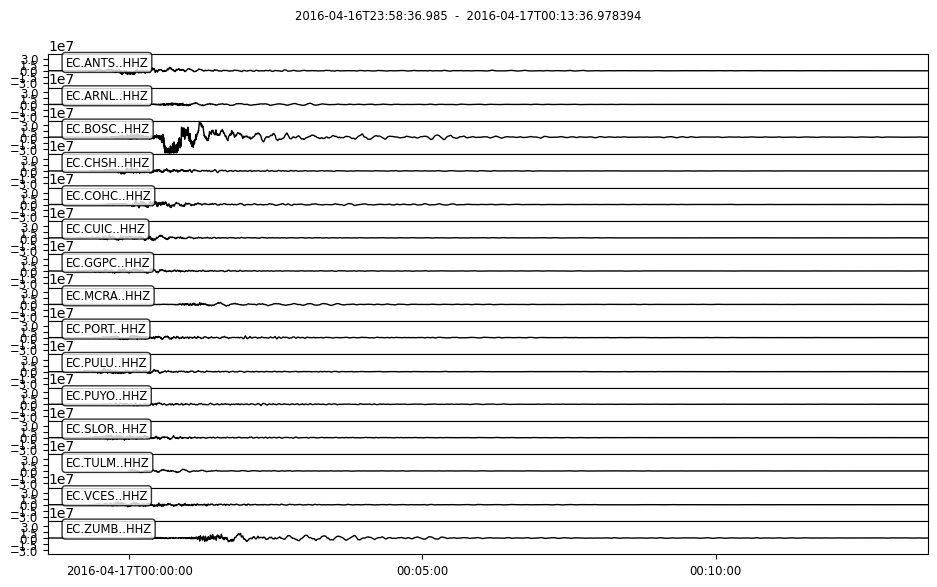

In [28]:
st.plot(size=(1000, 600));

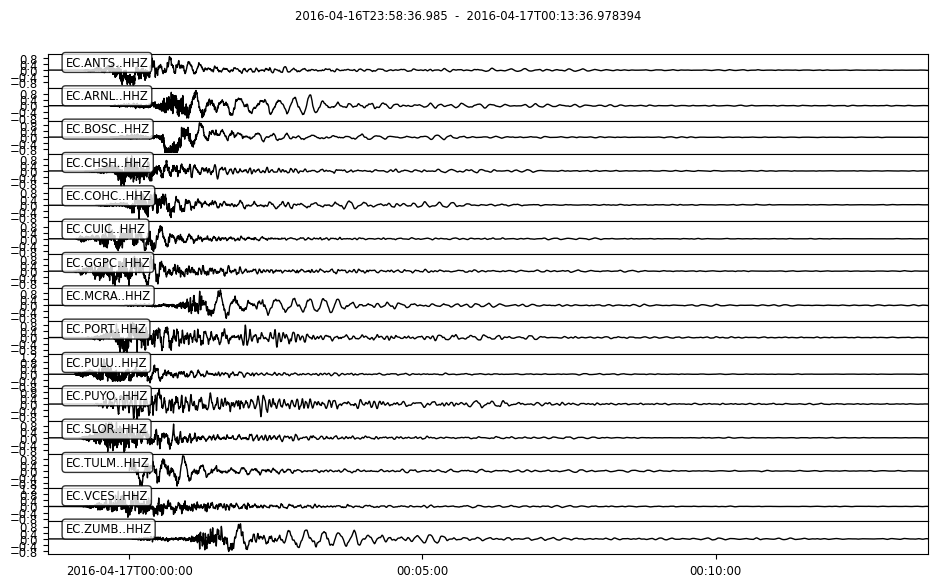

In [29]:
st.detrend("linear")
st.normalize();
st.plot(size=(1000, 600));

### Study of the frequency domain
Now, we go into the spectral domain to see the frequencies of the earthquake, with the filtered signal.

100.0


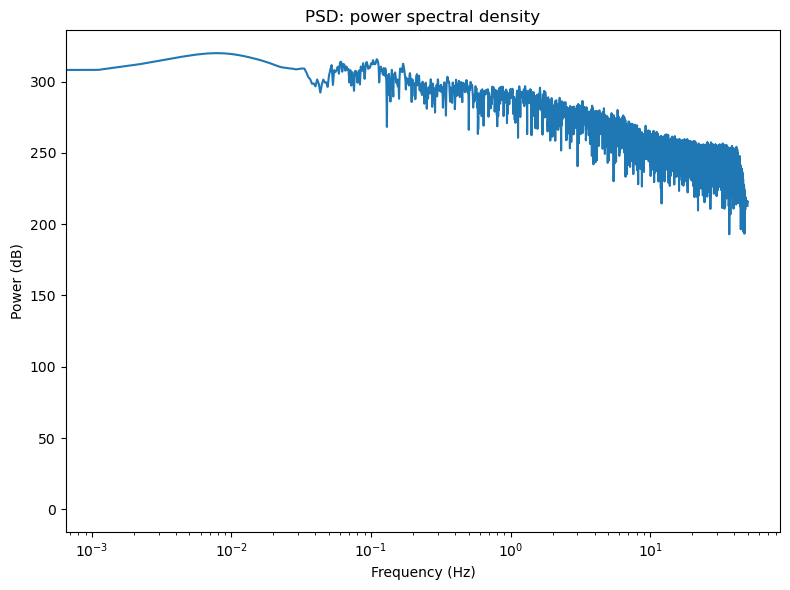

100.0


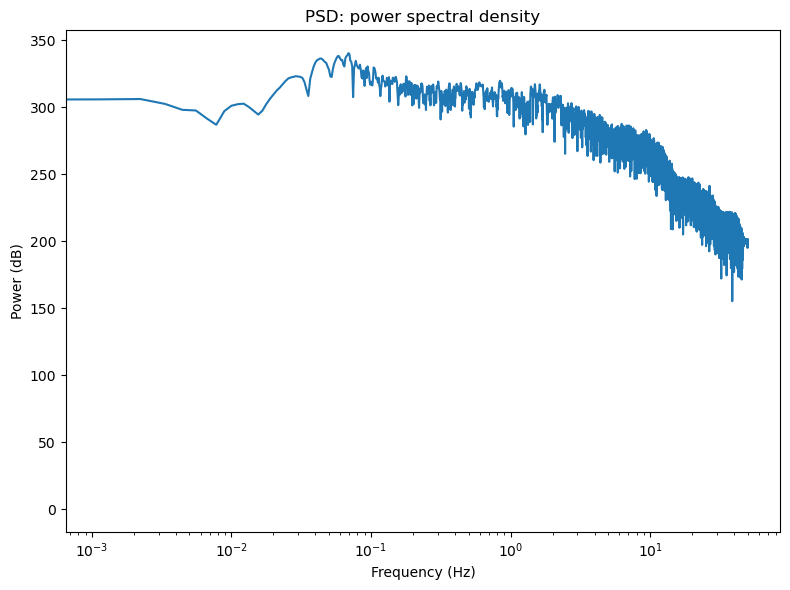

100.0


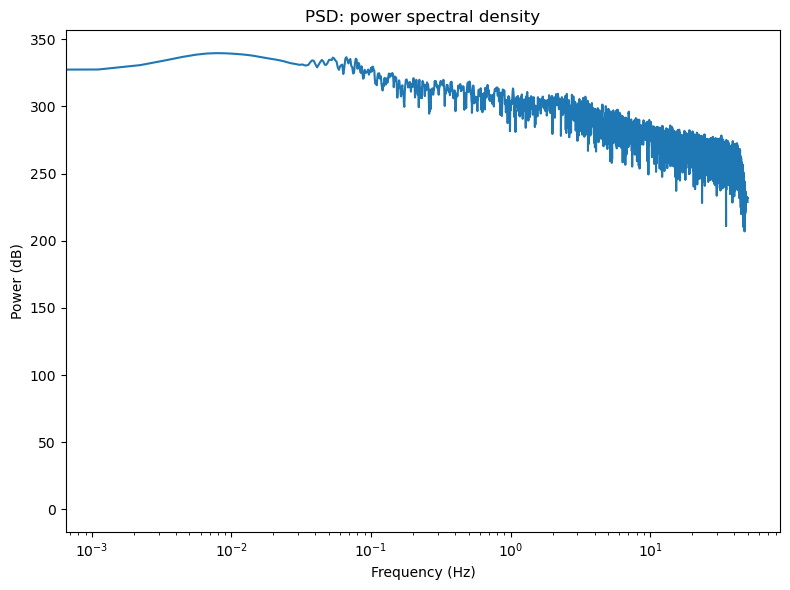

100.0


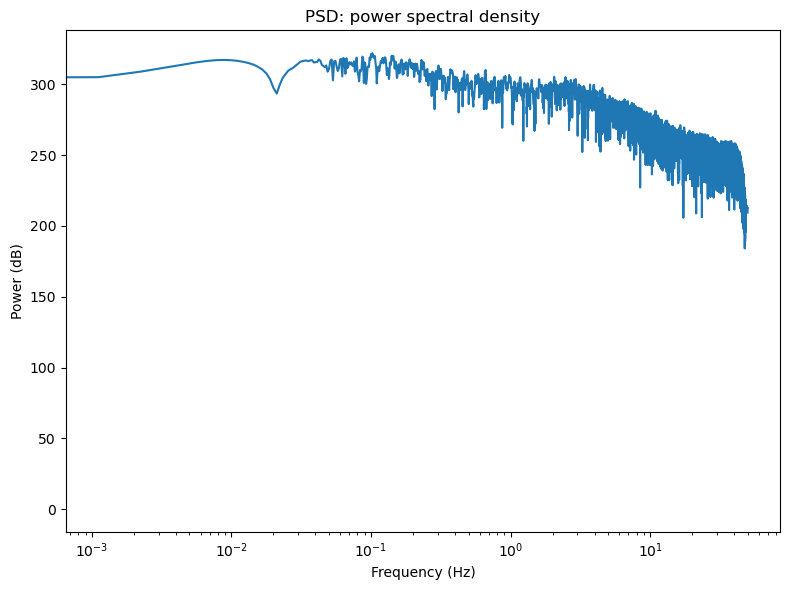

100.0


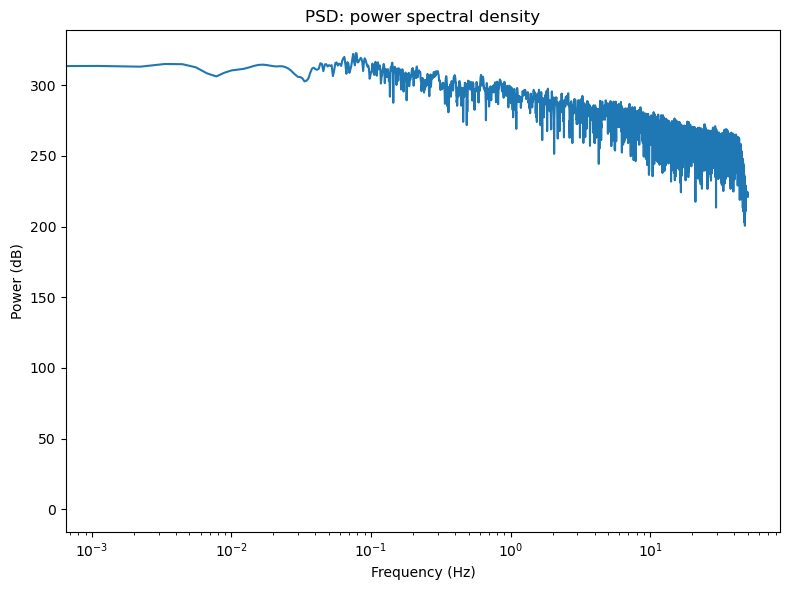

100.0


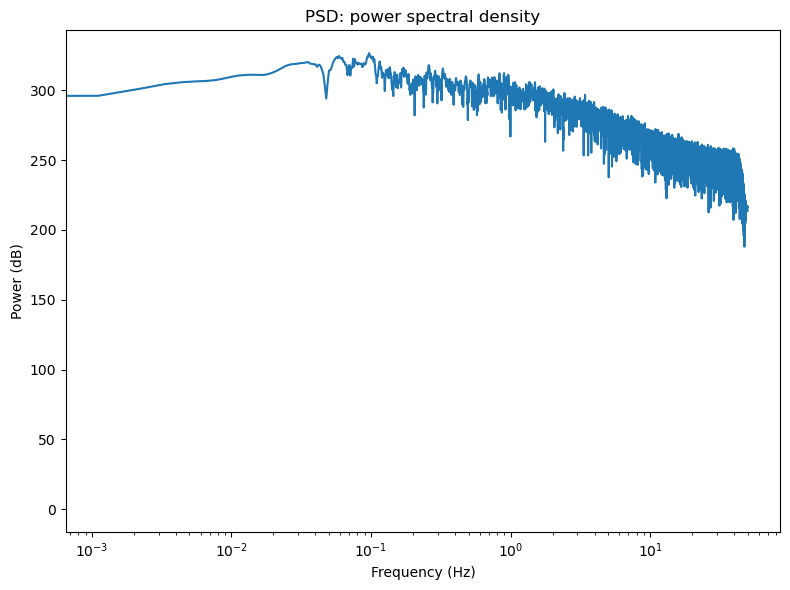

100.0


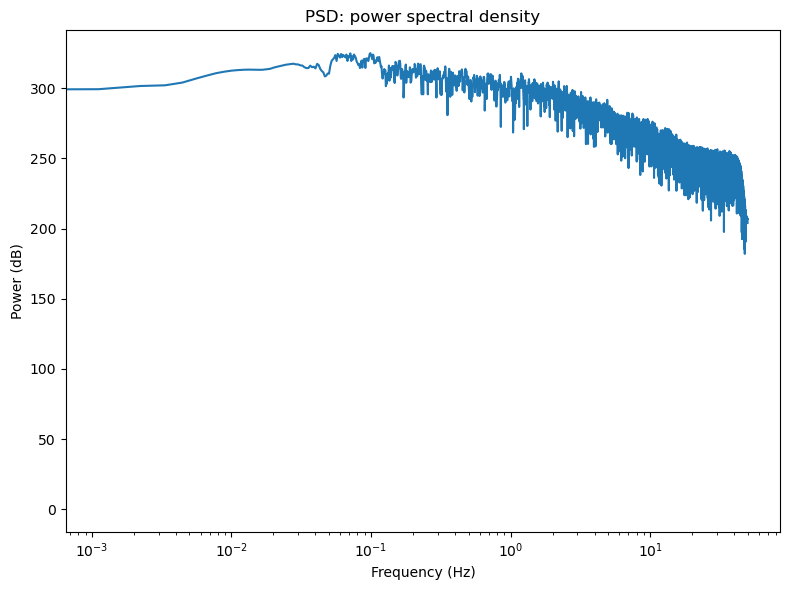

100.0


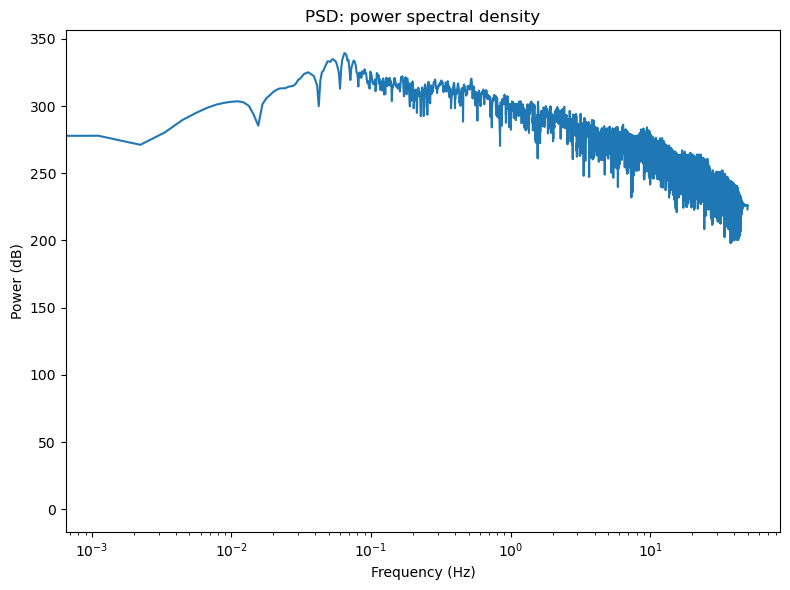

100.0


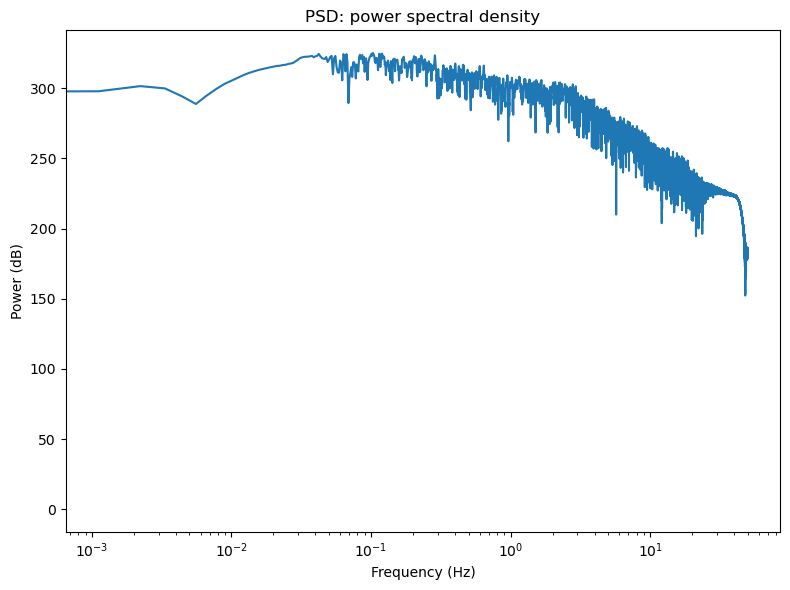

100.0


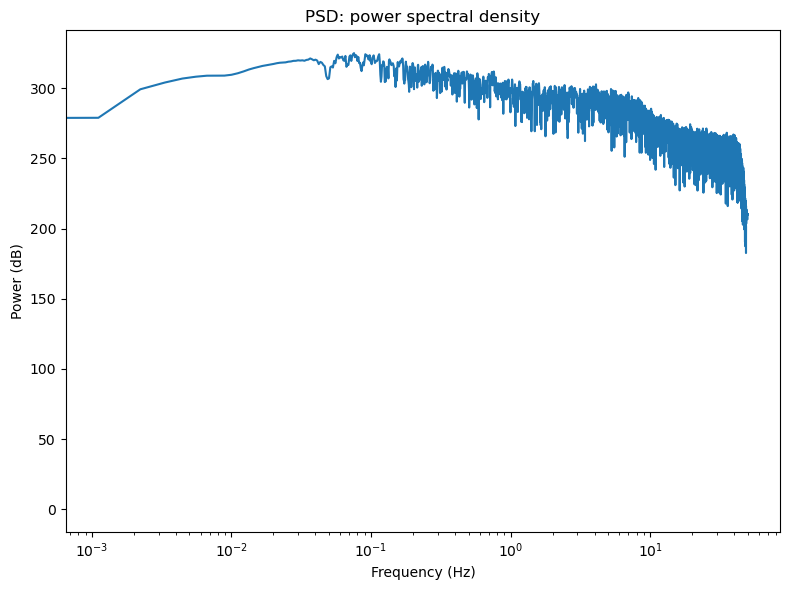

100.0


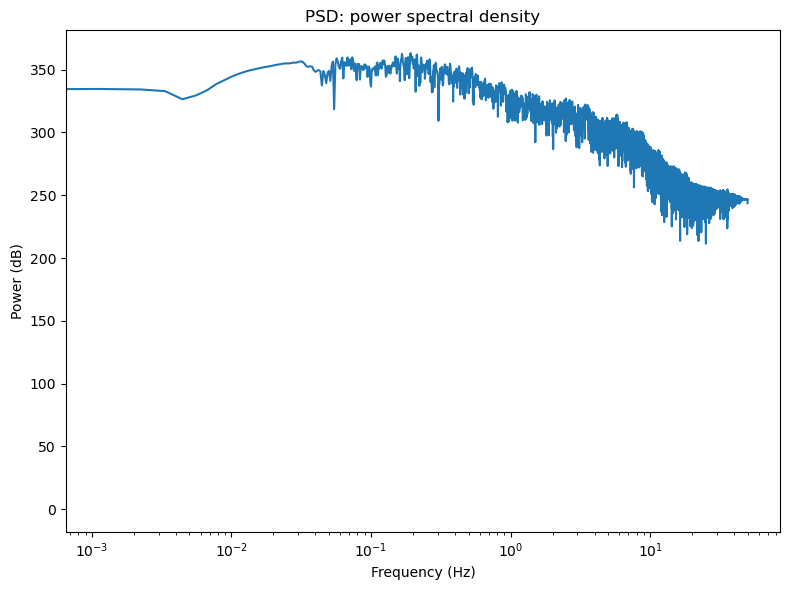

100.0


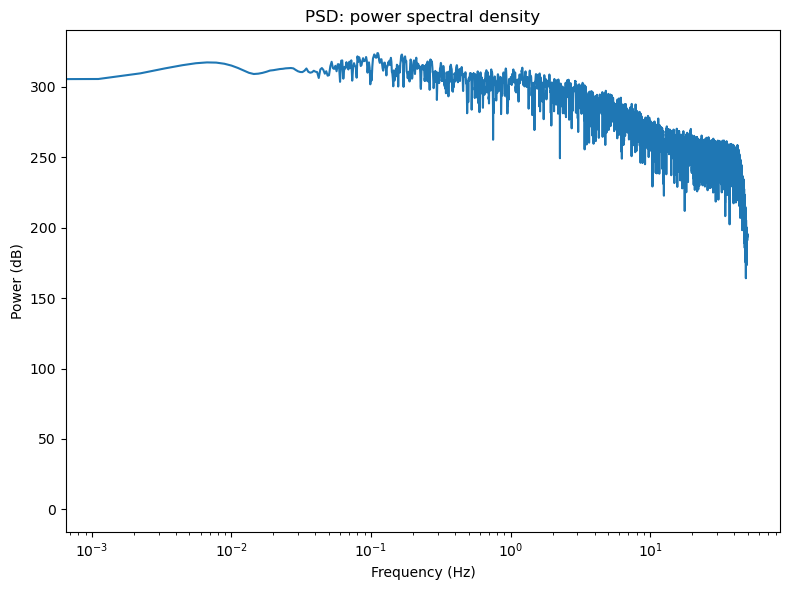

100.0


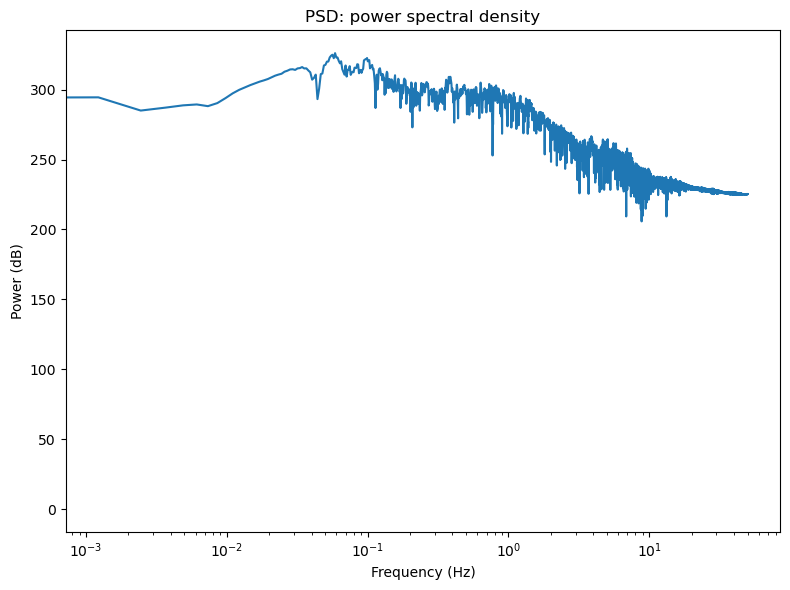

100.0


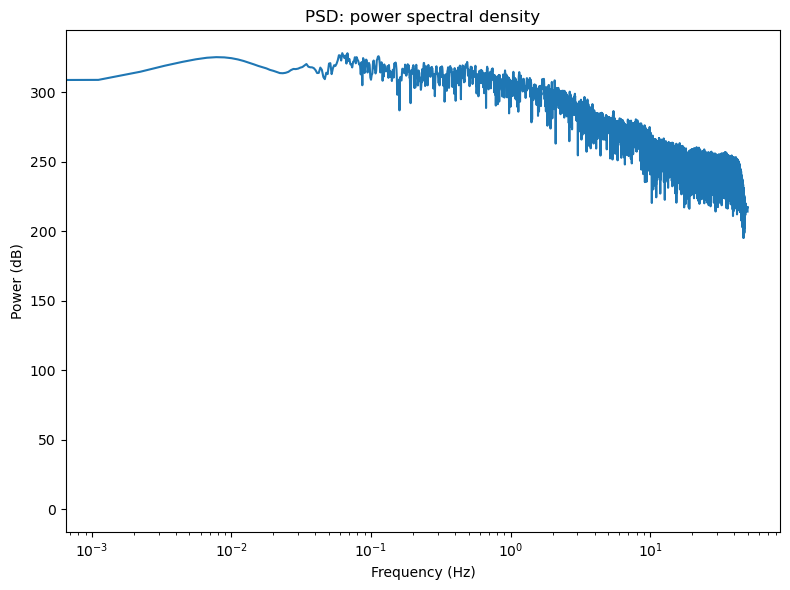

100.0


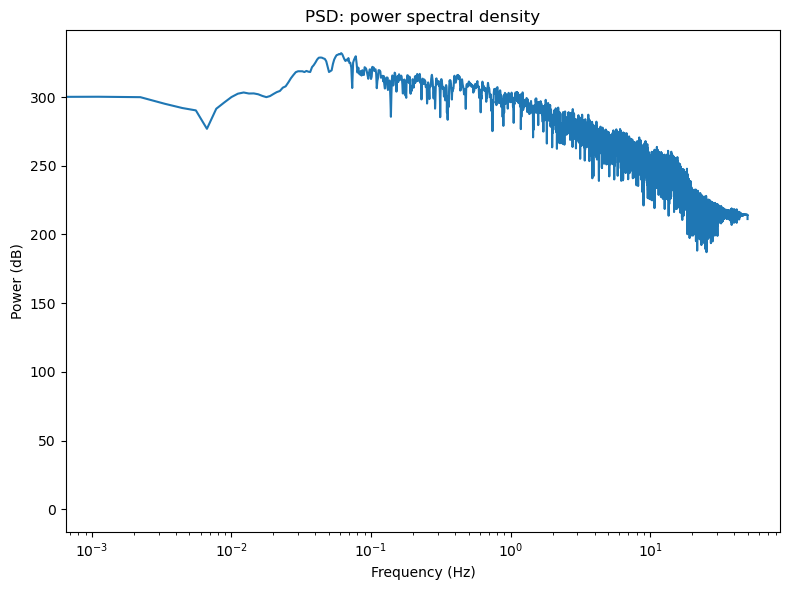

In [30]:
for i in range(0,15) :
    x = st[i].data
    sampling_rate = st[0].stats.sampling_rate
    print(sampling_rate)
    get_periodogram(
        x, fs=sampling_rate, semilog=True, show=True
    );

### Treatment of the data
The response of the instruments is removed, and a bandpass filter is applied.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent.

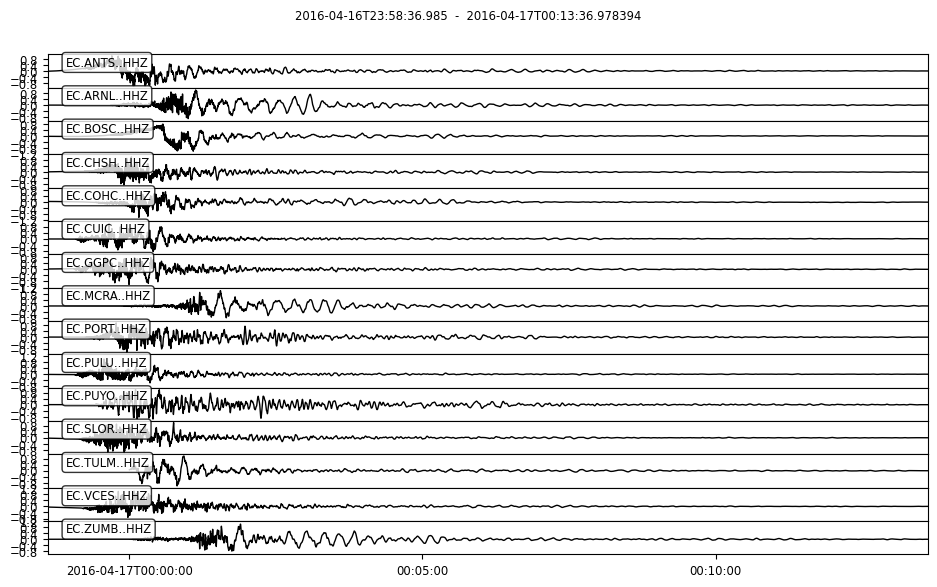

In [31]:
st.detrend("linear")
st.remove_response(output="VEL", water_level=10)
# here is the application of the vandpass filter. We can choose easily the cutoff frequencies
#st.filter("bandpass", freqmin=0.01, freqmax=0.1)
#st.filter("bandpass", freqmin=0.1, freqmax=1)
st.normalize()
st.plot(size=(1000, 600));

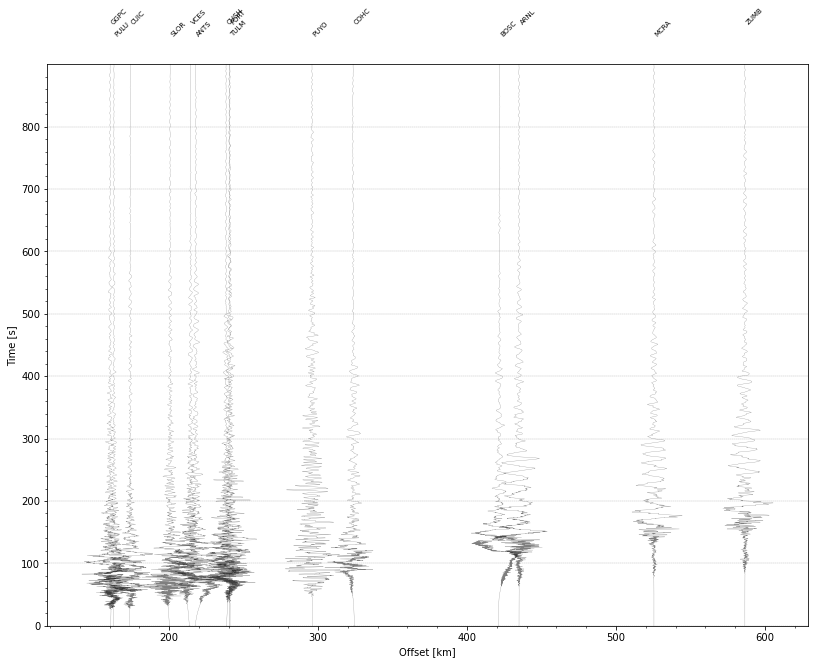

In [32]:
name = "record_section_ev_%s.png" % str(start)[:10]
plot_record_section(st, stations, eqo.latitude, eqo.longitude, outfile=name);

The filtered data is recorded in miniseed too.

In [33]:
st.write("./ecuador7.8.mseed")

/opt/conda/lib/python3.9/site-packages/obspy/io/mseed/core.py:790: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


### Study of the accelerometers
A new inventory is created, and the same process is used to plos the data from the accelerometers

In [34]:
inventory_N = client.get_stations(network="EC",
    station="*",
    location="*",
    channel="HNZ",
    starttime=start,
    endtime=start + 900,
)

In [35]:
st_N = client.get_waveforms(
    network="EC",
    station="*",
    location="*",
    channel="HNZ",
    starttime=start,
    endtime=start + 900,
    attach_response=True,
)

In [36]:
inventory_N = inventory_N.remove(station='COHC')
inventory_N = inventory_N.remove(station='SALI')
print(inventory_N)

Inventory created at 2021-12-12T18:43:34.747000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2016-04-16...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			EC
		Stations (3):
			EC.ARNL (RENSIG, RENAC)
			EC.BOSC (RENSIG, RENAC)
			EC.ZUMB (RENSIG, RENAC)
		Channels (0):



In [44]:
stations_N = []
for net in inventory_N:
    for sta in net:
        if minlat <= sta.latitude <= maxlat and minlg <= sta.longitude <= maxlg:
            stations_N.append(
                [net.code, sta.code, sta.latitude, sta.longitude, sta.elevation]
            )
    

In [45]:
carte_N =  plot_stations(stations_N, origin=[-3, -83], zoom=6, color="green")

In [46]:
carte_N

In [40]:
st_N.detrend("linear")
st_N.normalize();  

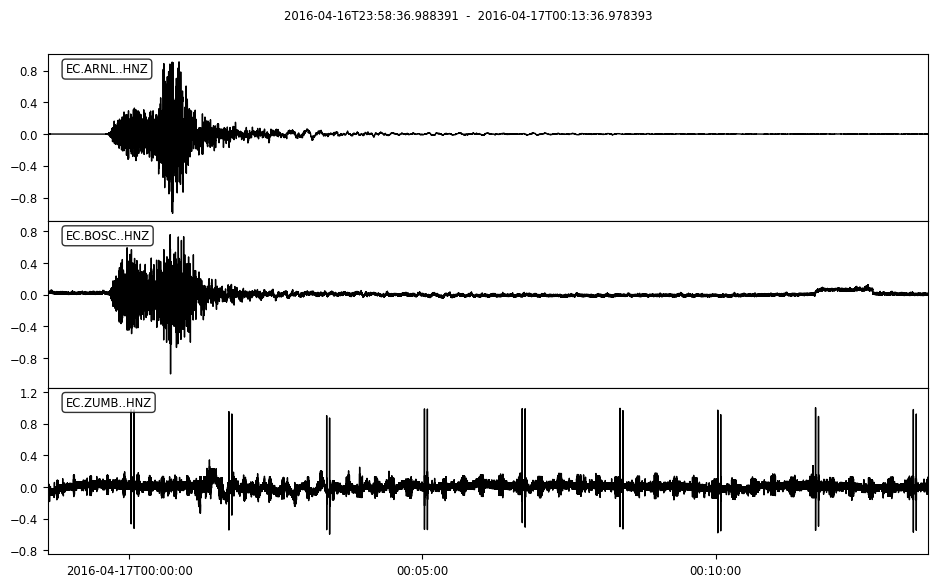

In [41]:
st_N.plot(size=(1000, 600));

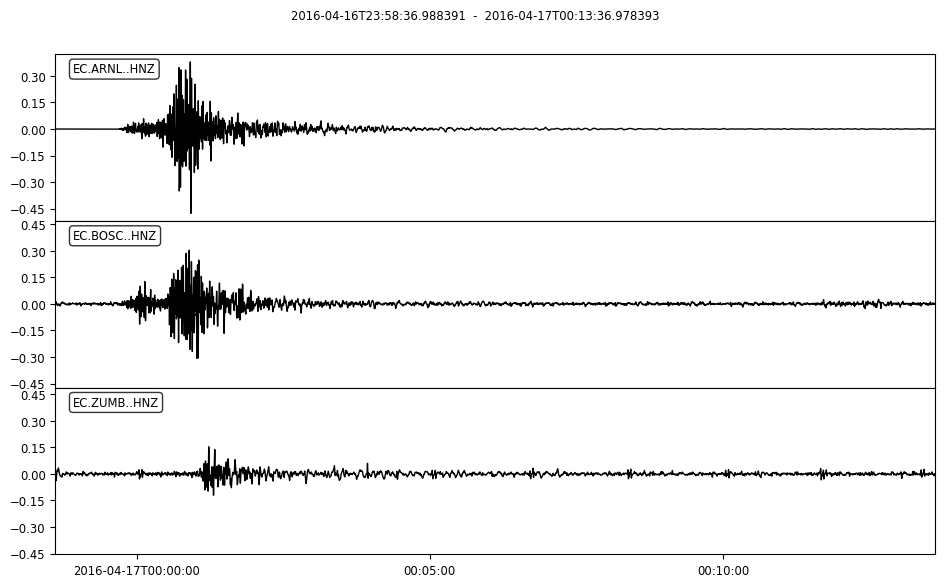

In [42]:
st_N.filter("bandpass", freqmin=0.1, freqmax=1)
st_N.plot(size=(1000, 600));

Stations Information
Station nº 1
EC.ANTS..HHZ | 2016-04-16T23:58:36.988393Z - 2016-04-17T00:13:36.978393Z | 100.0 Hz, 90000 samples
100.0


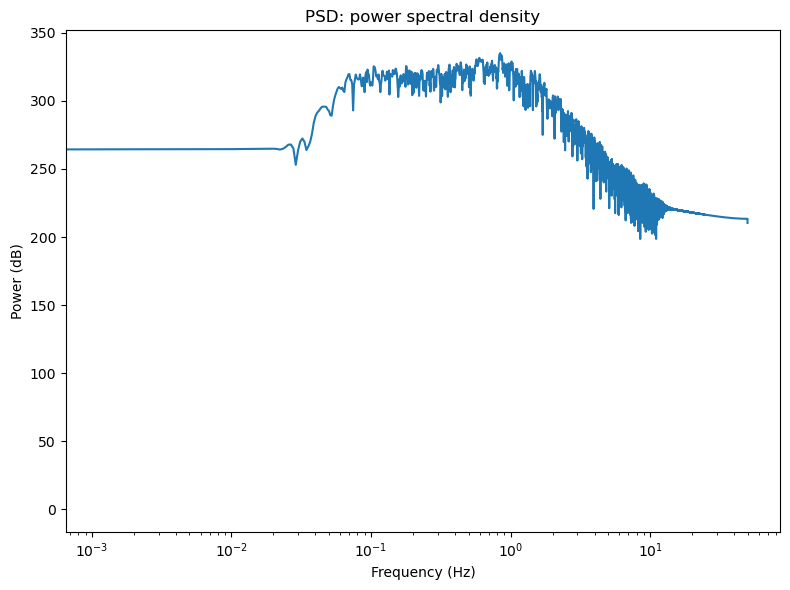

Stations Information
Station nº 2
EC.ARNL..HHZ | 2016-04-16T23:58:36.988393Z - 2016-04-17T00:13:36.978393Z | 100.0 Hz, 90000 samples
100.0


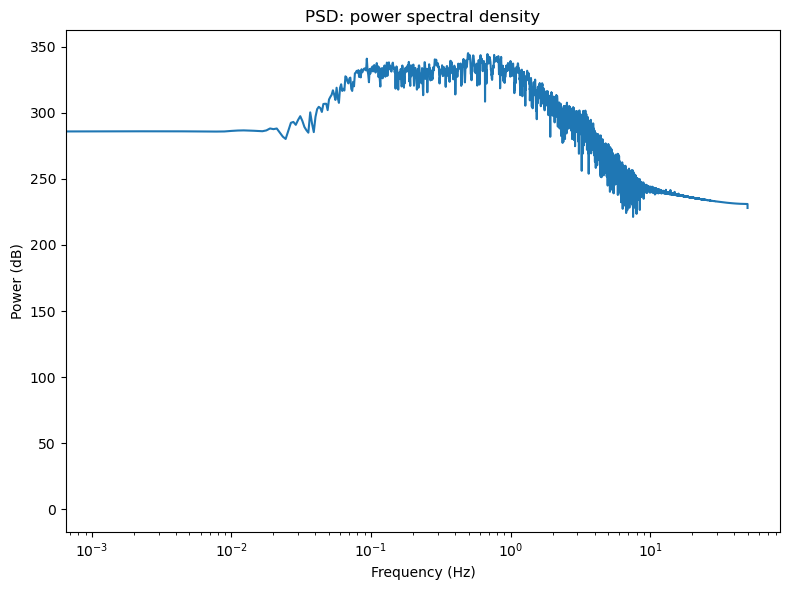

Stations Information
Station nº 3
EC.BOSC..HHZ | 2016-04-16T23:58:36.988393Z - 2016-04-17T00:13:36.978393Z | 100.0 Hz, 90000 samples
100.0


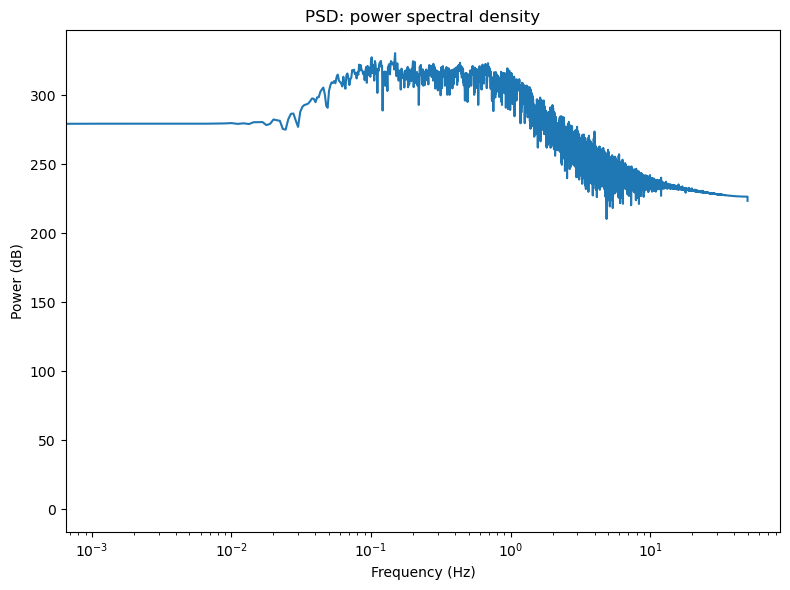

In [47]:
for i in range(0,3) :
    x = st_N[i].data
    sampling_rate = st_N[0].stats.sampling_rate
    print("Stations Information")
    print("Station nº", i+1)
    print(st[i])
    print(sampling_rate)
    get_periodogram(
        x, fs=sampling_rate, semilog=True, show=True
    );
    